**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными изучим общую информацию.

In [1]:
# Импорт библиотек.

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats as st

#### Считаем данные и сохраним в переменю data.

In [2]:
data = pd.read_csv('/datasets/games.csv')

#### Ознакомимся с данными.

In [3]:
pd.set_option('display.max_columns', None)

data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Сохраним кол-во строк до переработки.

data_old = data.shape[0]

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Описания данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


#### Выведем количество пропусков в данных.

In [8]:
# check
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Name,0.0
Genre,0.0
Platform,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0


### Переработка данных

#### Преобразуем название столбцов в нижний регистр

In [9]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изменим тип данных

* Посмотрим почему у нас в столбце `user_score` изначально тип object.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# Посмотрим сколько у нас tbd.

data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

И так у нас есть 2424 аббревиатуры **tbd**, как подсказывает интернет, то это - to be determined = будет определено, в данном случае предполагаем, что оценка еще не поставлена. Заменим **tbd** на **NaN**

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

* Избавимся от дробной части в столбце `year_of_release`, и преобразуем столбец `user_score` в тип float. Так же для `сritic_score` сделаем округление. 

In [13]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')
data['critic_score'] = np.floor(data['critic_score'])
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#### Заполним пропуски

* На первый взгляд видно, что пропуски совпадают по столбцам `critic_score`, `user_score` и `rating`.

`critic_score`, `user_score`, а так же `rating`,`name`,`genre` не будем трогать. `rating` заменим пропуски на norating . Также оставим пропуски в `year_of_release` не среднее не медийное нам тут точно не помогут, да и дата релиза на разных платформах одних и тех же игр может отличаться. 

In [14]:
data['rating'] = data['rating'].fillna('norating')

**Итог:** Причина пропусков может быть, что игры у нас с разных континентов, а принятие и определение рейтингов для компьютерных видеоигр в данных предоставляется от ESRB (Entertainment Software Rating Board), расположенная в США и Канаде. Предполагаю, что для европейцев и японцев есть своя рейтинговая система. По той же причине могут быть и пропуски в оценках от критиков и пользователей. Вряд ли японец 'полезет' на американский сайт, что бы поставить оценку игре. Так же не мало важный фактор, что не которые игры могли выходить, когда ни каких платформ для оценивания игр еще не существовало.

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


* Поиск дубликатов.

In [17]:
data.duplicated().sum()

0

### Исследовательский анализ

#### Посмотрим сколько игр выпускалось в разные годы.

In [18]:
# Цветовой стиль для наших графиков

plt.style.use('seaborn-darkgrid')

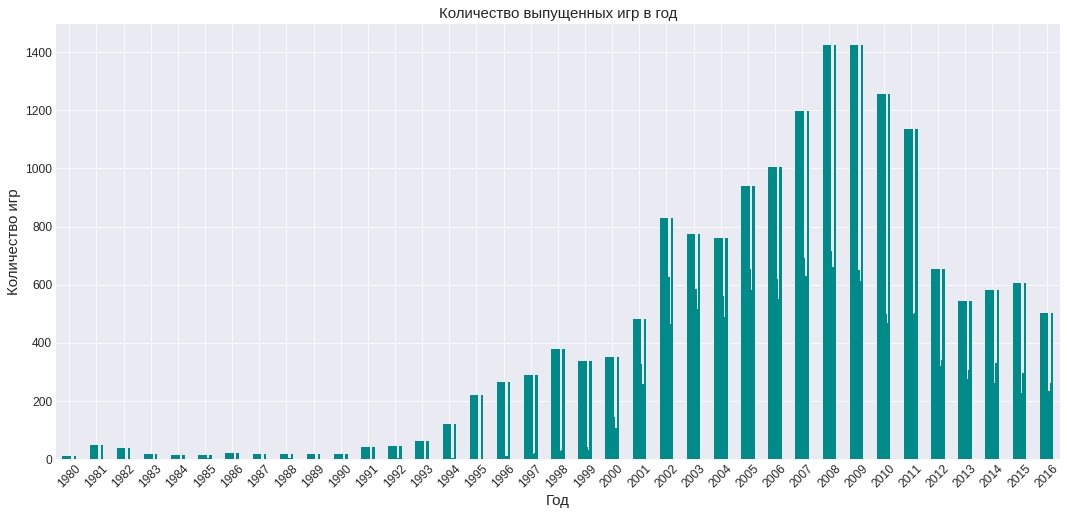

In [19]:
group_year_of_release = data.groupby('year_of_release').count()

group_year_of_release.plot.bar(figsize=(18,8), fontsize= 12, fc='darkcyan', legend=False, rot=45);

plt.title('Количество выпущенных игр в год', size=15);
plt.ylabel('Количество игр', size=15);
plt.xlabel('Год', size=15);

В 90-х начинается рассвет для игр. Появляются процессы и ОС, на которых можно что то поиграть. Выходит консоль Sony Playstation-1. В 2000 появляются графические процессы, которые должны обеспечивать желаемую высокую производительность всей подсистемы. 2001-2002 выходит Xbox. Итак 2002 у нас 3 основные платформы для игр: PC, PS, XBox. В последующие годы происходи бум в видеоиграх до 2009. Количество выпушенных игр в 2008 и 2009 достигает свыше 1400. В 2011 Google обновляет Android 4.0 - первая универсальная платформа, которая предназначена как для планшетов, так и для смартфонов. Половина мощностей уходит на производство игр на Android платформе. Так же на рынок видеоигр повлиял кризис 2008 года. В октябре 2008 года цена акций EA упала на 75% с 50 до 15 долларов.

#### Посмотрим, как менялись продажи по платформам.

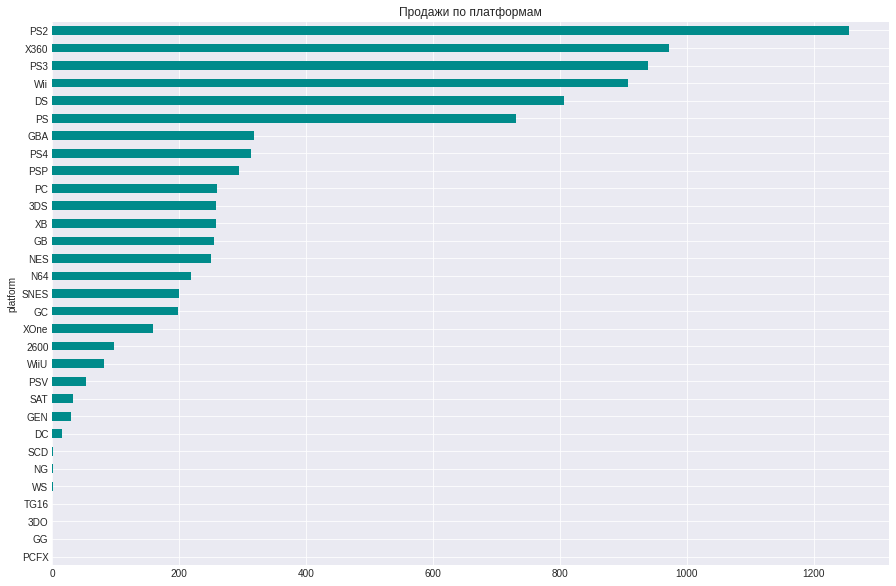

In [20]:
data_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales')

data_pivot.plot.barh(figsize=(15,10),  fc='darkcyan', title='Продажи по платформам', legend=False);

Можем наблюдать что в лидерах PS2, X360, Wii, PS3, DS и PS основные причины лидерства, сложно реализуемое пиратство, по сравнению с тем же PC где игр выходила на порядок выше. Так же не стоит забывать что примерно с 2008, вводится игры по подписке. 

#### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

* Определим, за какой характерный срок, появляются новые и исчезают старые платформы.

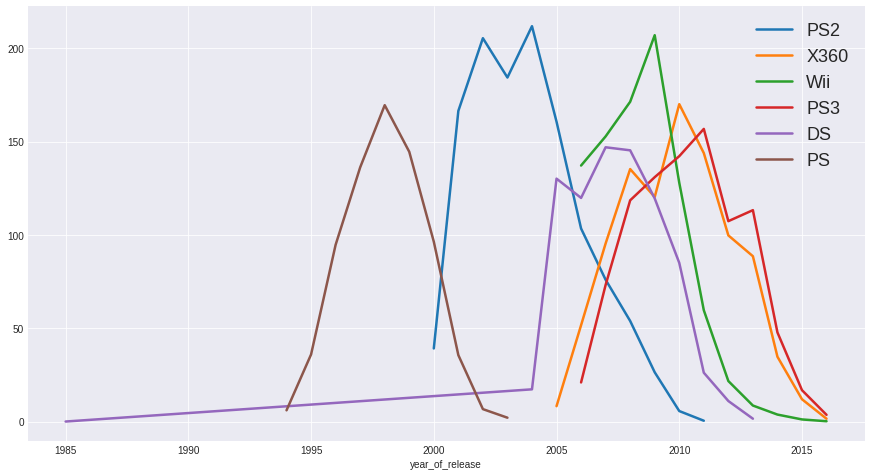

In [21]:
# Выберем топ 6 платформ выделяющейся на графике выше.

top_platform = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

# Построим график в цикле по срезу top_platforms

for row in top_platform:
    data.loc[data['platform'] == row]\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales',kind='line',fontsize=10,linewidth=2.5, figsize=(15,8));
plt.legend(top_platform, fontsize= 18);

По графику можем сказать, что средняя продолжительность платформы составляет 10 лет. Кроме семейства DS, где консоли обновлялись чаще, таки модели, как Nintendo DS, Nintendo DS Lite, Nintendo DSi, Nintendo DSi XL. В средам жили по 2 года.
Так же можем заметить что спустя 6 лет после выхода PS выходит PS2, а еще спустя 6 лет выходит PS3. В целом на разработку новой PlayStation уходит 6 лет. 

In [22]:
data = data.drop((data[(data['platform'] == 'DS') & (data['year_of_release'] < 2004)]).index)

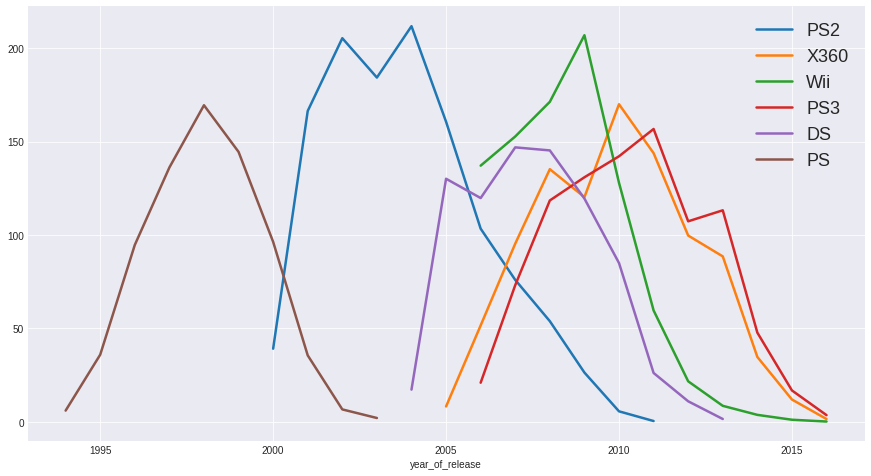

In [23]:
# Выберем топ 6 платформ выделяющейся на графике выше.

top_platform = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

# Построим график в цикле по срезу top_platforms

for row in top_platform:
    data.loc[data['platform'] == row]\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales',kind='line',fontsize=10,linewidth=2.5, figsize=(15,8));
plt.legend(top_platform, fontsize= 18);

#### Возьмем данные за соответствующий актуальный период

* Требуется определить, за какой период будем брать данные, что бы помогли построить прогноз на 2017 год. Учитывая, что средняя продолжительность консолей 10 лет, было бы не плохо взять данные за 10 лет. Но на разработку новой консоли тратиться 6 лет. Так же не стоит забывать, что влияние на рынок оказал кризис 2008 года. И игры по подписке так же стали предоставляться после 2008 года. Актуальным периодом будем считать с 2013 по 2016 год.

In [24]:
# Сделаем срез year_of_release >= 2013.

data_2013 = data.query('year_of_release >= 2013')

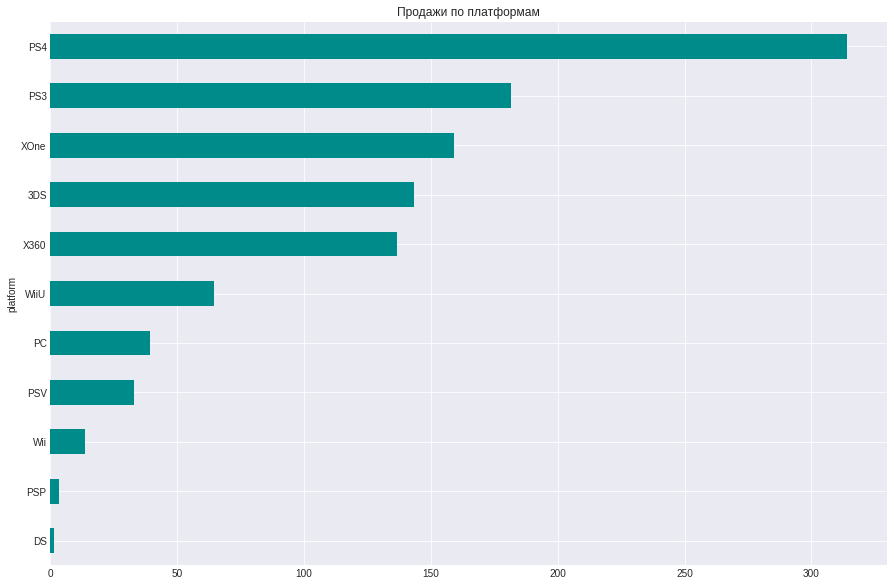

In [25]:
data_2013.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales')\
.plot.barh(figsize=(15,10),  fc='darkcyan', title='Продажи по платформам', legend=False);

Итак, лидеры поменялись. PS4, PS3 и XOne в тройке лидеров. Актуальный год сразу показывает нам прибыльные платформы. 3DS - одна из топовых Японских платформ, про нее так же не будем забывать. Далее идет X360. Она, как и PS3, платформа старого поколения, на которых не стоит возлагать большие надежды. Они доживают свою эпоху. Далее еще одна платформа, популярная на Японском рынке, WiiU так же показывает хорошие продажи. PC и PSV имеют не плохое количество проданных копий.

#### Взглянем по отдельности на некоторые платформы.

In [26]:
top_platform_2013 = ['PS4', '3DS','XOne', 'PC', 'WiiU']

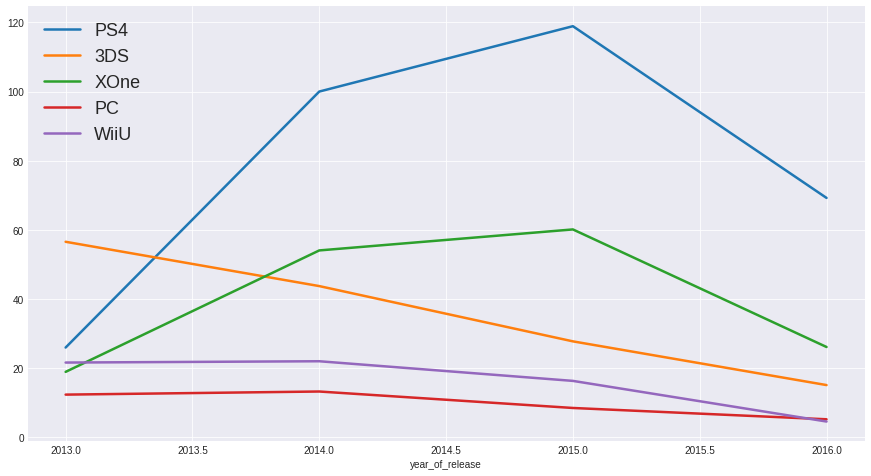

In [27]:
for row in top_platform_2013:
    data_2013.loc[data['platform'] == row]\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales',kind='line',fontsize=10,linewidth=2.5, figsize=(15,8));
plt.legend(top_platform_2013, fontsize= 18);    

Сделаем срез до 2016 года т.к. данные могут быть не полными. <a id='intro'></a>

In [28]:
top_platform_2013_2015 = ['PS4', '3DS','XOne', 'PC', 'WiiU', 'PS3', 'X360', 'PSV']

data_2013_2015 =  data.query('2013 <= year_of_release < 2016')

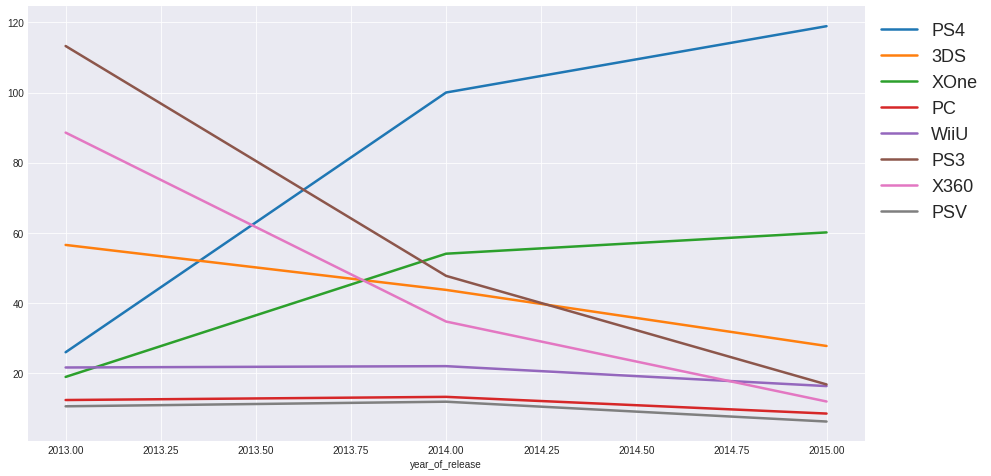

In [29]:
for row in top_platform_2013_2015:
    data_2013_2015.loc[data_2013_2015['platform'] == row]\
    .groupby('year_of_release')['total_sales'].sum()\
    .plot(x='year_of_release', y='total_sales',kind='line',fontsize=10,linewidth=2.5, figsize=(15,8));
plt.legend(top_platform_2013_2015, fontsize= 18, bbox_to_anchor=(1, 1));

Как и оказалось потенциально прибыльные платформы PS4 и XOne. Так же оставим 3DS, WiiU и PC. PSV за 2 года не показала не каких скачков роста, а ближе 2015 идет на убыль, да и продажи меньше остальных.

#### Посмотрим на график «ящик с усами» по глобальным продажам игр в разбивке по топ платформам. 

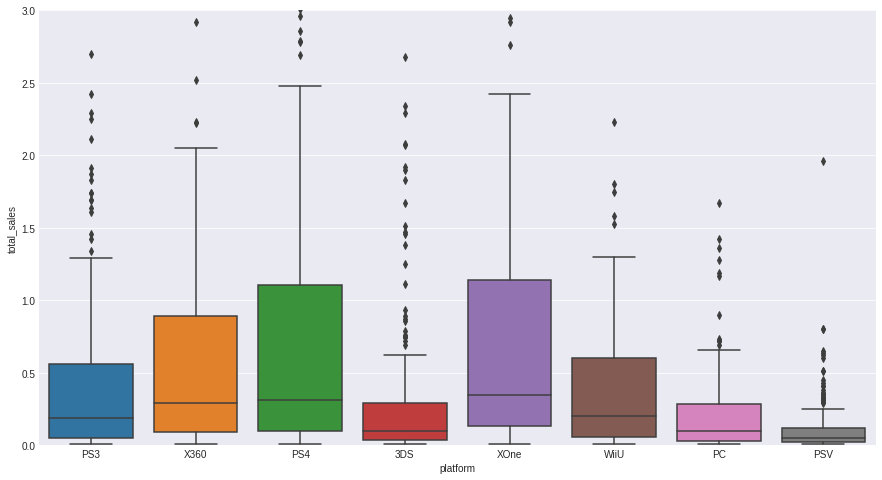

In [30]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.boxplot(y="total_sales", x="platform", data=data_2013_2015[data_2013_2015['platform'].isin(top_platform_2013_2015)], 
            orient='v');
plt.ylim(0, 3);

Исходя из графика, на 1 местах обе топовые платформы PS4 и XOne показывает хороший результат, приблизительно  2.5 млн. проданных копий. Далее можем выделить X360 с чуть выше 2 млн. проданных копий. Так же не плохие продажы и у WiiU и PS3 примерно с 1.3 млн, чуть ниже будет PC и 3DS - 0.7 млн копий. И PSV c 0.25 млн.проданных копий. Еще раз мы потвердели, что для нас лучшими платформами будут **PS4, XOne, 3DS, WiiU и PC**.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

* Для этого построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.\
* Возьмём 2 топовые платформы, не слишком старые, но и у которых достаточное количество игр с оценками от критиков и игроков. 
 **X360 и PS3**

In [31]:
def score_plot_corr (df, pl_name, appraiser_name):
    critic_user = df.loc[df['platform'] == pl_name]
    critic_user.plot.scatter(x=appraiser_name, y='total_sales', figsize=(12, 6));
    return print('Корреляция Пирсона:', df[appraiser_name].corr(critic_user['total_sales']))

* Построим диаграмму рассеивания по оценкам пользователей и общей суммой продаж. Посмотрим на корреляцию Пирсона. Для **X360** 

Корреляция Пирсона: 0.11445882978454186


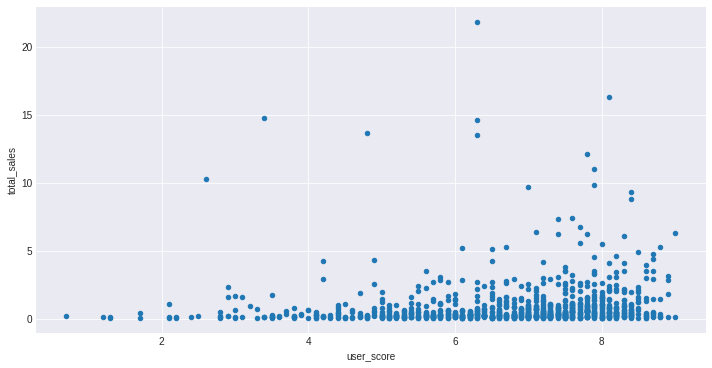

In [32]:
score_plot_corr(data, 'X360', 'user_score')

* Так же взглянем на конкурента **PS3**

Корреляция Пирсона: 0.12669133936341692


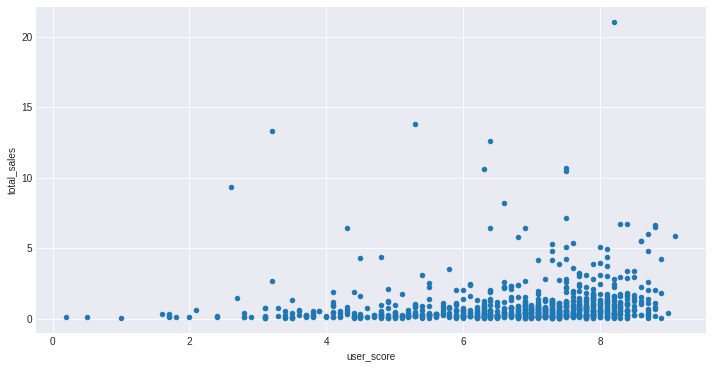

In [33]:
score_plot_corr(data, 'PS3', 'user_score')

Корреляцию Пирсона всего 0.11 и 0.12 очень маленькая, взаимосвяь. Как оказалось что оценка пользователи не сильно влияю на конечную сумму продаж. Так бывает когда ожидание не совпадает с реальностью. Ожидали одну игру котроая была показана в трейлере а получили совсем другое. 

* Построим диаграмму рассеивания по оценкам критиков и общей суммой продаж. Посмотрим на корреляцию Пирсона. Для **X360**

Корреляция Пирсона: 0.3937358653072584


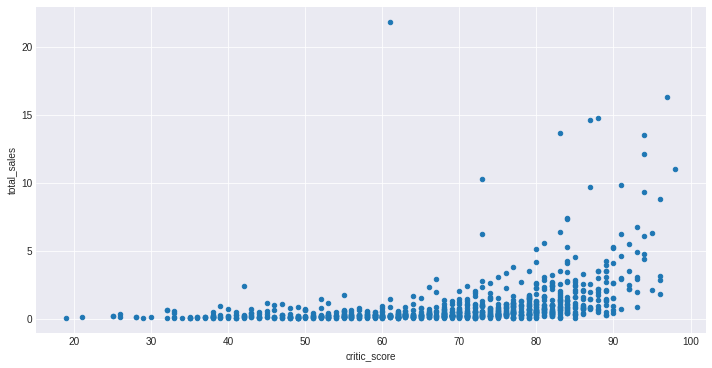

In [34]:
score_plot_corr(data, 'X360', 'critic_score')

* Так же и для  **PS3**

Корреляция Пирсона: 0.43243156856420634


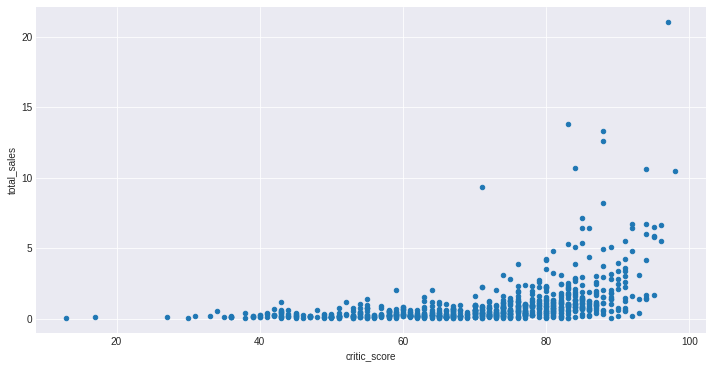

In [35]:
score_plot_corr(data, 'PS3', 'critic_score')

Корреляцию Пирсона уже лучше 0.39 и 0.43, не сказать чтобы, взаимосвязь очень сильная, но влияние оценок критиков частично влияет на количество проданных игр.  Критики вносят в свой вклад, целью критиков не просто дать оценку чему либо, но увидеть всю картину целиком - замечать все течения и тенденции. Обращая внимания на ключевые особенности игры или их отсутствие, если в описание они есть, а в игре - нет. Оценка критиков будет хорошим критерием при отборе игр в свой магазин.  

#### Посмотрим на общее распределение игр по жанрам. Какие самые прибыльные жанры.

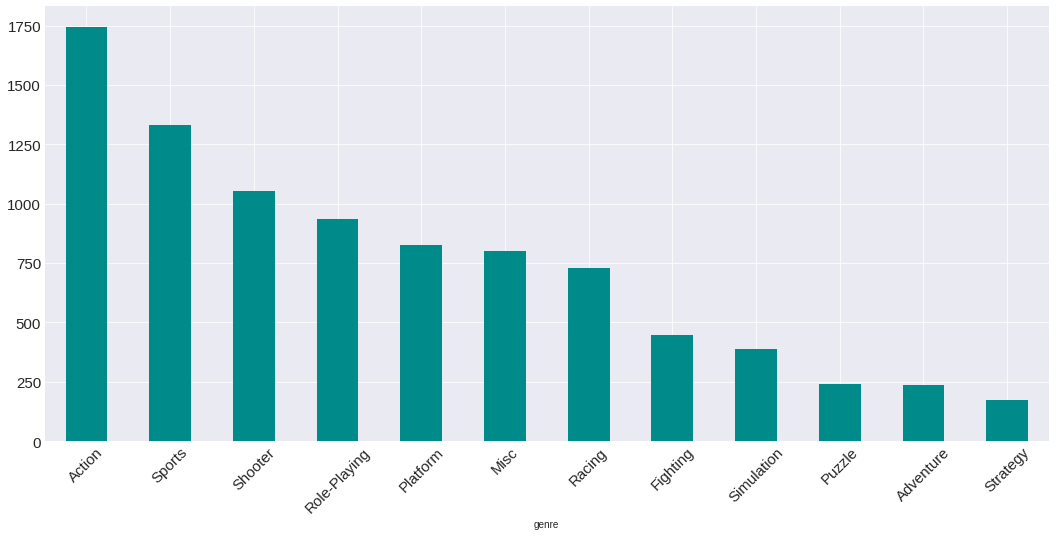

In [36]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)\
.plot.bar(figsize=(18,8), fc='darkcyan', rot=45, fontsize=15);

Глядя на график, можно сказать, что самым прибыльным жанром является Action более 1500 млн проданных копий. Но не стоит забывать, сколько времени и бюджета уходит на разработку одной экшен игры. Рассмотрим на примере GTA5. Её разработка длилась 2 года и участвовали в ней 200 человек. Так же сейчас обычно тратит в два или три раза больше на маркетинг и рекламу, чем на разработку игры. Если посмотрим на жанр Adventure, то он скорей поджанр Action. Обычно они указываются вместе на примере всей той же GTA5. Жанр Sports, который в нашем случае на 2 месте с 1200 млн. копий. Обусловлено тем, что затрат на игру идет меньше, а поиграть в спортивный симулятор на примере FIFA найдется большое количество поклонников. Так же можно выделить жанр Puzzle. С разработкой игры справиться 1-2 человека, на рекламу куда меньше будет затрат, а по количеству продаж показывает неплохой результат.

* Взглянем на диаграмму размаха. По актуальной дате 2013-2015

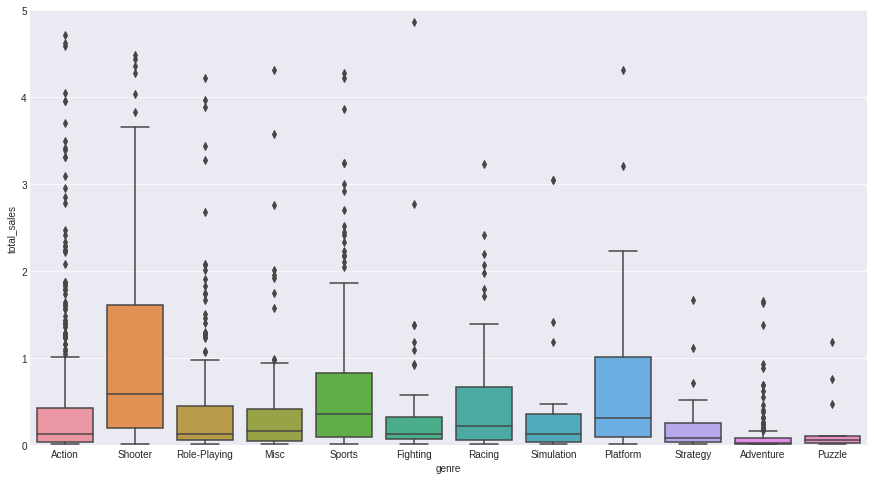

In [37]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.boxplot(x='genre', y='total_sales', data=data_2013_2015.sort_values('total_sales', ascending=False));
plt.ylim(0, 5);

И так у нашего лидера **Action** большое количество выбросов. У жанра **Sports** они так же не в малом количестве, но медийные показатели выглядят по лучше. **Adventure** и **Puzzle** потерялись на графике. Посмотрим на диаграмму без выбросов.

* Взглянем на диаграмму размаха без выбросов по актуальной дате 2013-2015.

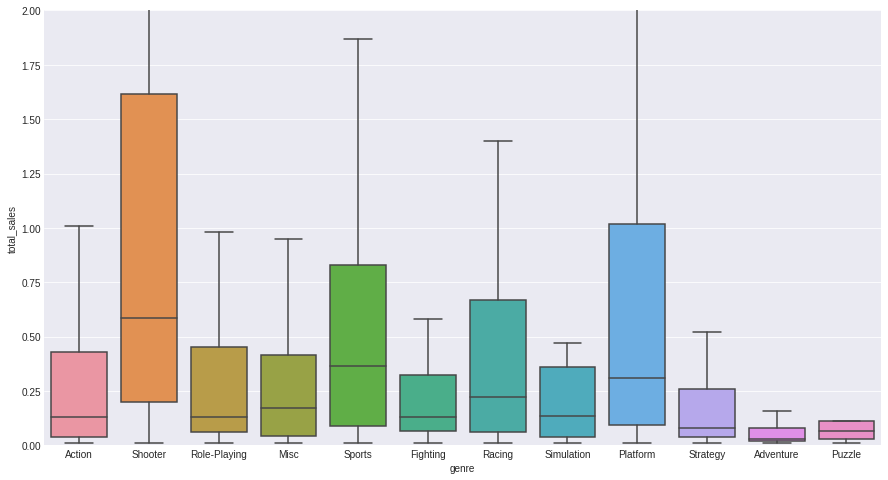

In [38]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.boxplot(x='genre', y='total_sales', data=data_2013_2015.sort_values('total_sales', ascending=False), showfliers=False);
plt.ylim(0, 2);

Тут же картина совсем другая, более прибыльным, стабильным жанром становиться **Shooter** с медийными показателями в пределах 0.6 млн копий, на 2 месте **Sports** с медийным показателем продаж в 0.32 млн.  далее можем выделить жанры **Platform** с медийным показателем в 0.27 млн копий. Не плохие продажи показывает жанр **Racing** c медийными продажами в 0.23 млн. **Action** точно не будем списывать со счетов. Это топовый жанр, так же как и **RPG**.

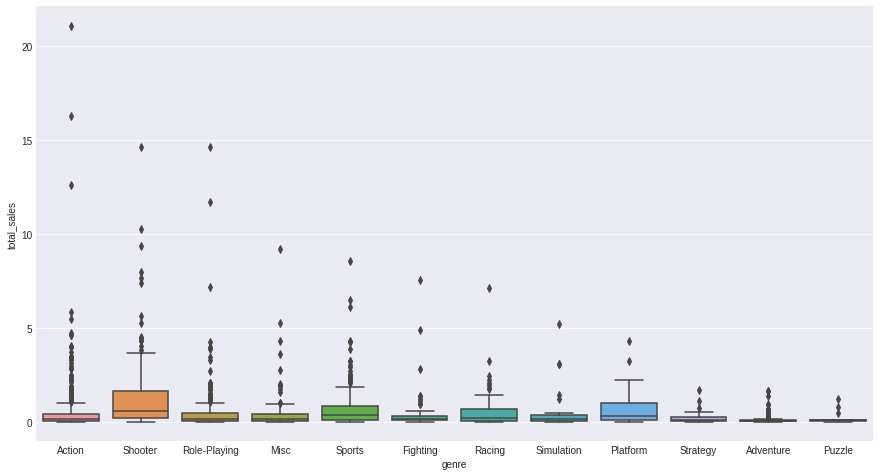

In [39]:
# check
fig, axes = plt.subplots(figsize=(15, 8))

sns.boxplot(x='genre', y='total_sales', data=data_2013_2015.sort_values('total_sales', ascending=False));
# plt.ylim(0, 5);

### Составим портрет пользователя каждого региона

#### Самые популярные платформы (топ-5),  для пользователя каждого региона (NA, EU, JP)

In [40]:
def top_five_platform(variable, sales, num):
    df = data_2013_2015.groupby(variable)[sales].sum().sort_values(ascending=False)
    other = df[6:].sum()
    df = df[:6].copy()
    df['Other_genre'] = other
    df.plot.bar(figsize=(20, 7), fc='darkcyan', rot= 50, fontsize=17, ax=ax[num])
    title_list = {'na_sales': 'Северная Америка',
                 'eu_sales':'Европа', 'jp_sales':'Япония'}
    ax[num].set_title(title_list[sales], size=18)  
    ax[num].set_xlabel('')

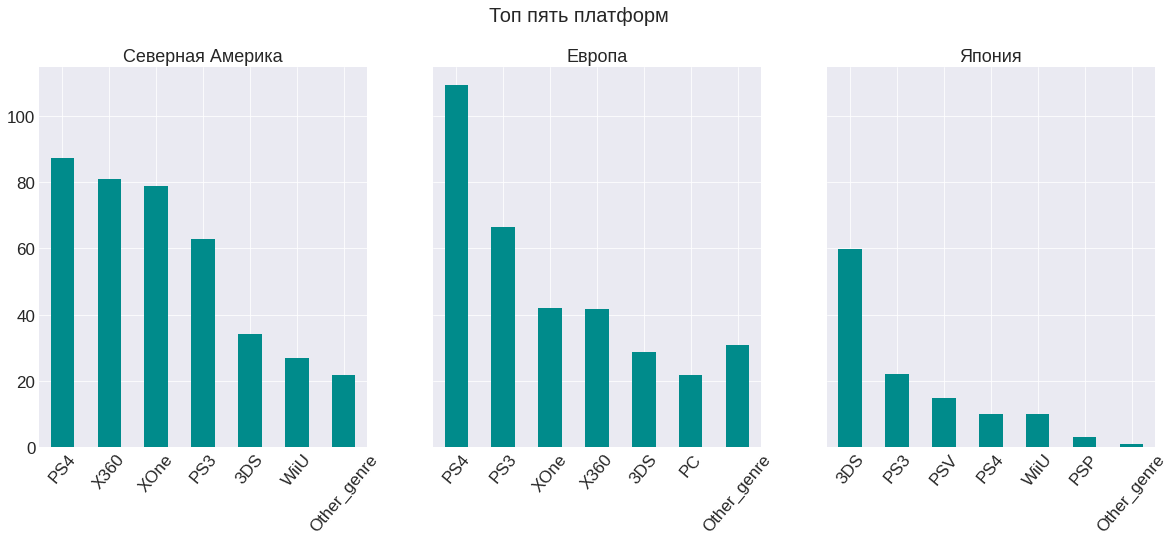

In [41]:
fig, ax = plt.subplots(1, 3, sharey=True)
fig.suptitle('Топ пять платформ', y = 1, fontsize = 20)

top_five_platform('platform','na_sales', 0)
top_five_platform('platform','eu_sales', 1)
top_five_platform('platform','jp_sales', 2)

Итак, если рассмотреть графики за актуальный период c 2013 топ пять платформ, то в Северной Америке предпочтения отдают больше PS4 продажи показывают отличный результат в 87 млн. копий. На втором месте идет Xbox 360 и не так сильно отстает Xbox One у обоих продажи около 80 млн. Далее PS3 c 63 млн. копий. Так же есть и фанаты 3DS с 35 млн. проданных игр. В Европе лидирует так же PS4, но по количеству продаж больше свыше 100 млн. проданных игр. На втором месте в Европе уже идет PS3 сравнима по количеству продаж с Северной Америкой 65 млн. копий. На третей позиции Xbox One и Xbox 360 в 40 с копейками млн. копий. Ну и так же есть 3DS 30 млн. копий. В Японии же на первой строчке идет 3DS 60 млн. копий. Ведать всеми любима японцами платформа. На 2 месте PS3 в 21 млн. далее PSV c 18 млн. Еще строчкой ниже PS4 5 млн. и такой же результат у WiiU.

#### Самые популярные жанры (топ-5)

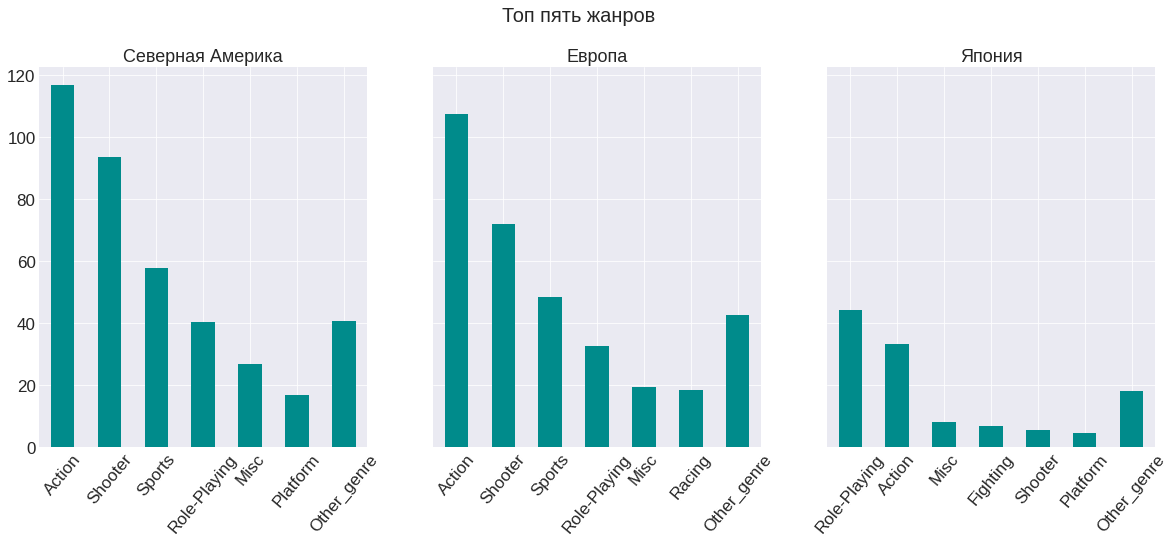

In [42]:
fig, ax = plt.subplots(1, 3, sharey=True)
fig.suptitle('Топ пять жанров', y = 1, fontsize = 20)

top_five_platform('genre','na_sales', 0)
top_five_platform('genre','eu_sales', 1)
top_five_platform('genre','jp_sales', 2)

Предпочтения по жанрам у Северной Америки и Европы практически идентичны. Первые 3 позиции - Action Shiooter Sports. 4 и 5 места занимаю жанры RPG и Misc. Японцы же отдают предпочтения RPG, далее выбирают Action. Менее же популярные - Misc, Fighting и Shiooter.

#### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

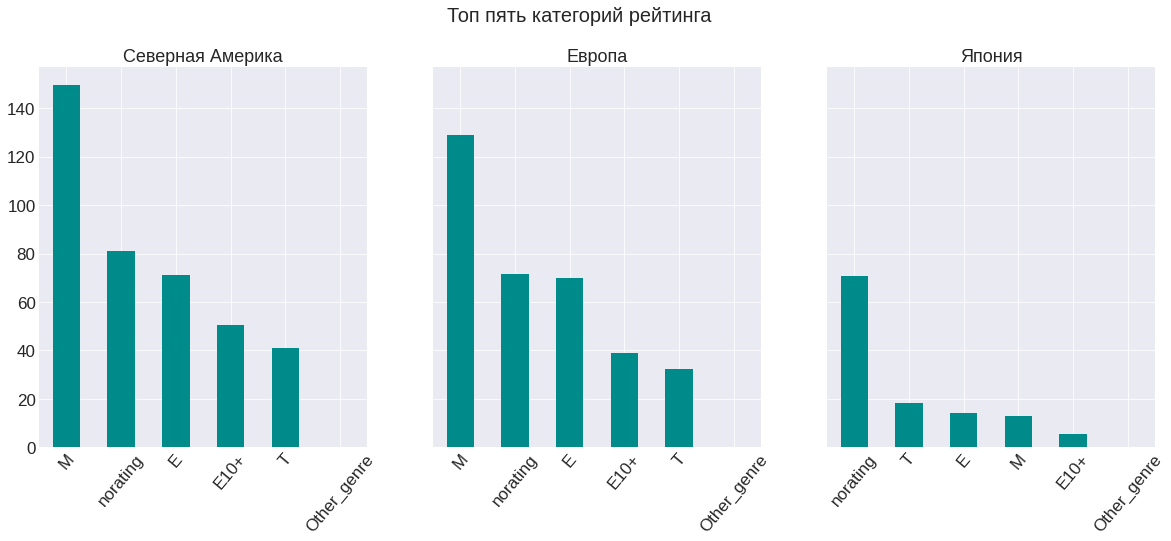

In [43]:
fig, ax = plt.subplots(1, 3, sharey=True)
fig.suptitle('Топ пять категорий рейтинга', y = 1, fontsize = 20)

top_five_platform('rating','na_sales', 0)
top_five_platform('rating','eu_sales', 1)
top_five_platform('rating','jp_sales', 2)

* **E** - Для всех
* **EC** - Для детей младшего возраста. Игра подходит для детей от 3 лет
* **E10+** - Для всех от 10 лет и старше
* **T** - Подросткам. Игра подходит для лиц от 13 лет
* **M** - Для взрослых. Материалы игры не подходят для лиц младше 17 лет.
* **norating** - не выставлена категория рейтинга.

Похоже, что предпочтения по жанрам в Северной Америке и Европе совпадают. На первом месте пользуется популярностью жанр для взрослых. На втором месте жанр без рейтинга. На третей позиции рейтинг тоже совпадает - категория E для всех. Вообще рейтинг по ESRB больше относиться к Северной Америке чем к Японии, поэтому у нас на первом месте игры без рейтинга. Если же издатель желает выпустить игру в Японии, то там он будет иметь дело с системой оценок от Computer Entertainment Rating Organization (CERO), которая занимается данным вопросом с 2002 года. На втором - категория T для лиц старше 13 лет. И на третьем месте категория для всех.

### Проверим гипотезы

* **1** - Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые
* **2** - Средние пользовательские рейтинги жанров **Action** и **Sports** разные.

Будем использовать распределения Стьюдента, т.к у нас гипотеза о равенстве средних двух генеральных совокупностей. Так же возьмём оптимальную дату. `data_2010_2015`\
Пороговое значение alpha = 0.05

#### Гипотеза №1

**H_0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
 **H_1:** Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [44]:
results = st.ttest_ind(
    data_2013_2015[data_2013_2015['platform'] =='XOne']['user_score'].notnull(),
    data_2013_2015[data_2013_2015['platform'] =='PC']['user_score'].notnull(),)

alpha = .05

# вывод значения p-value на экран 
print(f'p-value = {results.pvalue}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу ")

p-value = 0.06984423114968982
Не получилось отвергнуть нулевую гипотезу 


Значение **p-value** показывает: вероятность __случайно__ получить такое или большее различие равно почти 21%. Хотя средний рейтинги для разных платформ и разные по количеству проданных копий.

#### Гипотеза №2

**H_0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.\
**H_1:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [46]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, с вероятностью в почти 19% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками

###  Общий вывод

Итак: нам нужно было выявить определяющие успешность игры закономерности, что бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.  У нас были данные с 1980 по 2016, данные за 2016 не полные. Так же в данных нет игр для мобильных платформ. 


1. Нам удалось выявить что пиком по производству игр был 2008 - 2009 года, за этот период было произведено 2800 игр. Далее идет спад для игровой индустрии, до 2013 с количеством произведённых игр 680 шт. Начиная с 2014 идет рост но он не значительный. Основными причинами спада могли быть: кризис на мировом рынке , появления игр на мобильных платформах, и появления игр по подписке. 
2. Далее мы рассмотрели более топовые платформы по продажам за весь период, ими оказались **PS2** - более 1200 млн. проданных копий, **X360** - около 900 млн проданных копий, **Wii** - чуть свыше 800 млн. проданных копий, **PS3** - 800 млн. проданных копий, **DS** - 750 млн. проданных копий. Хотелось бы отдельно выделить **PC** и ее можно называть популярной платформой для игр, но к сожалению из-за пиратства страдают продажи игр всего чуть более 200 млн копий. Хотя в последние годы с этим активно борются и сами игроки стараясь поддержать производителя все чаще приобретают игры нежели качают их с торрентов. Так же мы определили что средняя продолжительность платформ составляет 10 лет, а на разработку новой платформы тратится 6 лет. 
3. Исходя из полученных данных для дальнейшего исследования мы взяли актуальный период с 2013 по 2016 не включительно. В данный период топовыми по продажам стали следующие платформы: **PS4** - 320 млн, **PS3** - 180 млн, **XOne** - 160 млн, **3DS** - 145 млн, **X360** - 135 млн, **WiiU** - 70 млн и **PC** - 40 млн.. **X360** и **PS3** топ платформы, но к сожалению они уже являются платформами предыдущего поколения и для дальнейшего анализа мы их не берем.
4. И так теперь у нас есть актуальный период с 2013 по 2015 включительно , и топ 5 платформ **PS4**, **3DS**,**XOne**, **PC**, **WiiU**. Рассмотрев [данные](#intro) мы смело выбираем **PS4** и **XOne** эти платформы показываю рост по продажам, но так же оставляем и **3DS** и **'WiiU** популярные в Японии. Ну и **PC** это классика всех поколений.
5. Далее мы рассмотрели, как сильно влияют оценки пользователей и критиков на количество продаж, по двум топовым платформам **X360** и **PS3**. Как и оказалась, влияние пользователей на общее количество продаж не влияет. Корреляцию Пирсона всего 0.11 и 0.12. Влияние критиков будет побольше Корреляцию Пирсона - 0.39 и 0.43. Все таки мнению критиков доверяют больше. Опять же тут больше строится на взаимовыгоде. Критикам дают игры раньше релиза, они ставят оценки и получают больше трафика на свой сайт. Кому предоставлять игры до релиза, решает же производители игр. И естественно он не будет предоставлять игры тем критикам, где ставят низкие оценки.
6. Следующей задачей нам предстояло определить самые прибыльные жанры. Мы выбрали диаграмму размаха, что бы можно было сравнить медийные значения, что бы определить, какая из платформ более стабильная. Самым прибыльным жанром является **Shooter** более 3.75 млн. проданных копий. На втором месте оказался жанр **Platform** с 2.2 млн копий.  Так же не забудем и про жанр **Sports**. прибыль от него хорошая, количество продаж 1.8 млн. копий. Какой либо спорт не сделай в спортивном симуляторе, найдутся фанаты, которые это купят. Еще один жанр **Racing** с 1.35 млн. копий, кто же не любит поиграть в гонки. В пределах 1 млн расположились **Action** и **RPG**. Все эти данные без учета выбросов.
7. Еще одной не менее интересной задачей было составить портрет пользователя каждого региона. Мы определили, что в Северной Америке популярной платформой стала **PS4**. Продажи показывают отличный результат в 87 млн. копий игр. Топовым же жанром стал Action в 118 млн копий игр, а по рейтингу ESRB самая популярная категория M для взрослых свыше 140 млн копий. В Европе самая популярная платформа так же стала PS4 да и количество продаж подросло свыше 100 млн копий. Топ жанром оказался все тот же Action в 113 млн копий. Ну и по рейтингу ESRB также категория M - для взрослых в 128 млн копий. У жителей Япония совсем другие предпочтения по платформам, жанрам и рейтингом. Топовой платформой оказалась Nintendo 3DS с количеством в 60 млн. копий. Топовый жанр стал RPG 42 млн копий и категория norating  - не выставлена категория рейтинга ESRB с 70 млн копий.
8. Последнее, что рассмотрели, это две гипотезы. 
    
    Первой гипотеза была, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Отвергнуть мы ее не смогли значение p=0.21 при пороговое значение alpha = 0.05. По данным можно сказать, что так оно и есть.
    
    Вторая гипотеза звучала следующим образом: средние пользовательские рейтинги жанров Action и Sports одинаковые. Так же и эту отвергнуть гипотезу не смогли, значение p=0.98 при пороговое значение alpha = 0.05. Тут так же можем сказать, что случайность того, что рейтинги будут разные, очень мала.
    
**Общий итог**
Для нашего интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.  Что бы сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию на 2017 год лучшим вариантом будет:

Для Северной Америки и Европы, стоит акцентировать внимания на платформы **Xone, PS4** и **PC** и жанрами **Shooter, Action, Sports.** С рейтингом M и высокими оценками от критиков.

Для Японской же аудитории лучше подойдёт платформы **PS4, 3DS, WiiU** и жанры **RPG, Action, Misc.** Для Японии на рейтинг ESRB можно не отталкиваться, но так же стоит обращать на оценки критиков.